# Regression Analysis

In [17]:
%matplotlib inline
import pandas as pd
import numpy as np
from urllib import urlretrieve

In [2]:
es_url = 'http://www.stoxx.com/download/historical_values/hbrbcpe.txt'
vs_url = 'http://www.stoxx.com/download/historical_values/h_vstoxx.txt'
urlretrieve(es_url, 'data/es.txt')
urlretrieve(vs_url, 'data/vs.txt')
!ls -o data/

total 3104
-rw-r--r--  1 jmp  688500 Jan 31 22:12 es.txt
-rw-r--r--  1 jmp  531406 Jan 31 22:05 es50.txt
-rw-r--r--  1 jmp  363485 Jan 31 22:12 vs.txt


In [3]:
lines = open('data/es.txt', 'r').readlines()
lines = [ line.replace(' ', '') for line in lines ]
lines[:6]

['PriceIndices-EUROCurrency\n',
 'Date;Blue-Chip;Blue-Chip;Broad;Broad;ExUK;ExEuroZone;Blue-Chip;Broad\n',
 ';Europe;Euro-Zone;Europe;Euro-Zone;;;Nordic;Nordic\n',
 ';SX5P;SX5E;SXXP;SXXE;SXXF;SXXA;DK5F;DKXF\n',
 '31.12.1986;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '01.01.1987;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n']

In [4]:
for line in lines[3883:3890]:
             print line[41:],

317.10;267.23;5268.36;363.19
322.55;272.18;5360.52;370.94
322.69;272.95;5360.52;370.94
327.57;277.68;5479.59;378.69;
329.94;278.87;5585.35;386.99;
326.77;272.38;5522.25;380.09;
332.62;277.08;5722.57;396.12;


In [5]:
new_file = open('./data/es50.txt', 'w')
# opens a new file
new_file.writelines('date' + lines[3][:-1] + ';DEL' + lines[3][-1])
# writes the corrected third line of the original file
# as first line of new file
new_file.writelines(lines[4:])
# writes the remaining lines of the orignial file
new_file.close()

In [6]:
new_lines = open('./data/es50.txt', 'r').readlines()
new_lines[:5]

['date;SX5P;SX5E;SXXP;SXXE;SXXF;SXXA;DK5F;DKXF;DEL\n',
 '31.12.1986;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '01.01.1987;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '02.01.1987;770.89;891.78;82.57;97.80;97.43;69.37;647.62;65.81\n',
 '05.01.1987;771.89;898.33;82.82;98.60;98.19;69.16;649.94;65.82\n']

In [7]:
es = pd.read_csv('data/es50.txt', index_col=0, parse_dates=True, sep=';', dayfirst=True)
np.round(es.tail())
del es['DEL']
es.head()

,SX5P,SX5E,SXXP,SXXE,SXXF,SXXA,DK5F,DKXF
date,,,,,,,,
1986-12-31,775.00,900.82,82.76,98.58,98.06,69.06,645.26,65.56
1987-01-01,775.00,900.82,82.76,98.58,98.06,69.06,645.26,65.56
1987-01-02,770.89,891.78,82.57,97.80,97.43,69.37,647.62,65.81
1987-01-05,771.89,898.33,82.82,98.60,98.19,69.16,649.94,65.82
1987-01-06,775.92,902.32,83.28,99.19,98.83,69.50,652.49,66.06


In [8]:
es.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7673 entries, 1986-12-31 to 2016-10-04
Data columns (total 8 columns):
SX5P    7673 non-null float64
SX5E    7673 non-null float64
SXXP    7673 non-null float64
SXXE    7673 non-null float64
SXXF    7673 non-null float64
SXXA    7673 non-null float64
DK5F    7673 non-null float64
DKXF    7673 non-null float64
dtypes: float64(8)
memory usage: 539.5 KB


In [9]:
cols = ['SX5P', 'SX5E', 'SXXP', 'SXXE', 'SXXF',
                 'SXXA', 'DK5F', 'DKXF']
es = pd.read_csv(es_url, index_col=0, parse_dates=True, sep=';', dayfirst=True, header=None, skiprows=4, names=cols)
es.tail()

,SX5P,SX5E,SXXP,SXXE,SXXF,SXXA,DK5F,DKXF
2016-09-28,2846.55,2991.11,342.57,324.24,407.97,350.45,9072.09,581.27
2016-09-29,2848.93,2991.58,342.72,324.08,407.65,350.90,9112.09,582.60
2016-09-30,2843.17,3002.24,342.92,325.31,408.27,350.09,9115.81,583.26
2016-10-03,2845.43,2998.50,343.23,325.08,408.44,350.92,9131.24,584.32
2016-10-04,2871.06,3029.50,346.10,327.73,411.41,353.92,9212.05,588.71


In [10]:
vs = pd.read_csv(vs_url, index_col=0, header=2, parse_dates=True, sep=',', dayfirst=True)
vs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4357 entries, 1999-01-04 to 2016-02-12
Data columns (total 9 columns):
V2TX    4357 non-null float64
V6I1    3906 non-null float64
V6I2    4357 non-null float64
V6I3    4296 non-null float64
V6I4    4357 non-null float64
V6I5    4357 non-null float64
V6I6    4340 non-null float64
V6I7    4357 non-null float64
V6I8    4343 non-null float64
dtypes: float64(9)
memory usage: 340.4 KB


In [11]:
import datetime as dt
data = pd.DataFrame({'EUROSTOXX': es['SX5E'][es.index > dt.datetime(1999, 1, 1)]})
data = data.join(pd.DataFrame({'VSTOXX': vs['V2TX'][vs.index > dt.datetime(1999, 1, 1)]}))
data.tail()

,EUROSTOXX,VSTOXX
2016-09-28,2991.11,NaN
2016-09-29,2991.58,NaN
2016-09-30,3002.24,NaN
2016-10-03,2998.50,NaN
2016-10-04,3029.50,NaN


In [12]:
data = data.fillna(method='ffill')
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4554 entries, 1999-01-04 to 2016-10-04
Data columns (total 2 columns):
EUROSTOXX    4554 non-null float64
VSTOXX       4554 non-null float64
dtypes: float64(2)
memory usage: 106.7 KB


In [13]:
data.tail()

,EUROSTOXX,VSTOXX
2016-09-28,2991.11,35.6846
2016-09-29,2991.58,35.6846
2016-09-30,3002.24,35.6846
2016-10-03,2998.50,35.6846
2016-10-04,3029.50,35.6846


array([<matplotlib.axes.AxesSubplot object at 0x118286ed0>,
       <matplotlib.axes.AxesSubplot object at 0x118531c10>], dtype=object)

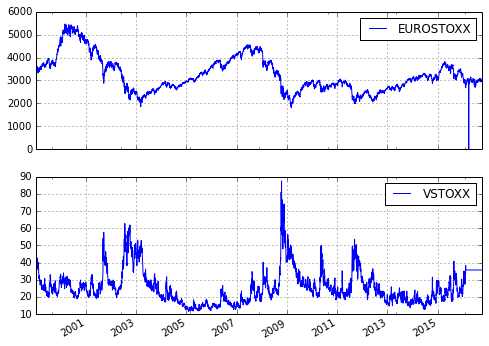

In [19]:
data.plot(subplots=True, figsize=(8, 6), grid=True, style='b')

In [38]:
rets = np.log(data / data.shift(1))
rets = rets.fillna(method='bfill')
rets.tail()

/Library/Python/2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


,EUROSTOXX,VSTOXX
2016-09-28,0.006800,0.0
2016-09-29,0.000157,0.0
2016-09-30,0.003557,0.0
2016-10-03,-0.001247,0.0
2016-10-04,0.010285,0.0


array([<matplotlib.axes.AxesSubplot object at 0x11861a8d0>,
       <matplotlib.axes.AxesSubplot object at 0x11876b290>], dtype=object)

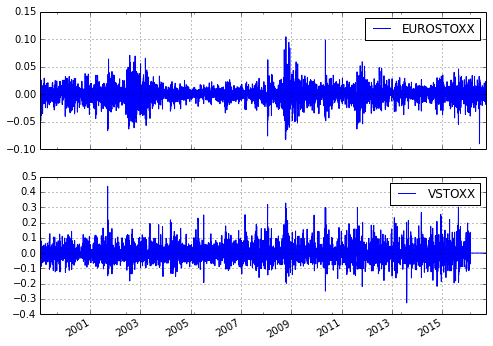

In [20]:
rets.plot(subplots=True, grid=True, style='b', figsize=(8, 6))

In [35]:
xdat = rets['EUROSTOXX']
ydat = rets['VSTOXX']
model = pd.ols(y=ydat, x=xdat)
model

ValueError: array must not contain infs or NaNs

In [36]:
model.beta

NameError: name 'model' is not defined